---
# PROJETO FINAL BOOTCAMP
---
Suspeitos por tempo de permanência na fronteira

Professores: Erick Muzart e Fernando Melo e Fernando Melo

Alunos:

Roberto Carlos Bordin
Thiago dos Santos Hendler
Wallinson Oliveira Schutte

### **Exercício: Descrição do projeto de machine learning**
Antes de escrever qualquer código, precisamos entender o problema que queremos resolver e fazer uma descrição eficiente do projeto, visando a comunicação  simples e rápida do objetivo do projeto para técnicos, gestores e colaboradores.  
  
**1- Descrição do problema ou tarefa:**  
Classificar os veículos que adentram na região de fronteira do Paraná com o Paraguai, em “Lícito” ou “Ilícito”, pelo tempo de permanência na fronteira e demais características do veículo.  
**2- Descrição da solução de IA:**  
Buscar dados dos últimos 2 anos de veículos que foram apreendidos, pela PRF, com descaminho. Calcular o tempo de permanência na fronteira. Buscar nos últimos 2 anos veículos que foram abordados pela PRF mas não foi encontrado ilícito.
**3- Fonte de dados:**  
Boletins de Ocorrências e registro de abordagens da PRF.  
**4- Variáveis independentes (preditoras ou "features"):**  
  placa, h_perm_front, anoModelo, categoria, cor,dataEmissaoCrv, descricaoTipoDocumentoProprietario, marcaModelo, municipioEmplacamento, tipo, ufEmplacamento, descricao.
**5- Variável dependente (resposta ou "target"):**  
ilicito: 0 (Lícito)
         1 (Ilícito)

Objetivo:  

Explicar o processo de descrição eficiente de um projeto de machine learning.
- Inclui as etapas para comunicar o problema, a solução de IA, a fonte de dados e as variáveis envolvidas.  
- Realizar uma análise exploratória de dados (EDA) utilizando o dataset Iris.
Descrição do conjunto de dados Iris, que contém três classes de plantas e quatro variáveis preditoras (largura e comprimento de pétalas e sépalas).


---
# Descrição das variáveis
---
| Nome da variável | Descrião
|---|---|
|placa|Dado sensível|
|tempofronteira|Tempo de permanência na fronteira (horas)|
|anomodelo|Ano do modelo do veículo|
|categoria|Categoria do veículo|
|cor|Cor do veículo|
|dataemissaocrv|Data da emissão da CRV - Documento do veículo|
|tipodocumentoproprietario|Tipo do documento do proprietário do veículo|
|marca|Marca do veículo|
|modelo|Modelo do veículo|
|municipioemplacamento|Município de emplacamento do veículo|
|ufemplacamento|UF de emplacamento do veículo|
|tipo|Tipo do veículo|
|consulta|Informações oriundas das consultas feitas do veículo no sistema feitas a qualquer momento|
|situacao|Variável target: 1 (ilícito), 0 (lícito)|

## Carregar bibliotecas

In [1]:
# importa biblioteca Pandas
import pandas as pd
# importa Matplotlib biblioteca de gráficos
import matplotlib.pyplot as plt
# importa Seaborn biblioteca de gráficos
import seaborn as sns

## Acessando o dataset no Drive


In [2]:
# Carregar  e instanciar dataset no Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Acessar arquivo "equipe_8.csv"
df = pd.read_csv('/content/drive/MyDrive/bootcamp/dados/equipe_8.csv', encoding='latin1')

Mounted at /content/drive


In [3]:
df.head()

,placa,h_perm_front,anoModelo,categoria,cor,dataEmissaoCrv,descricaoTipoDocumentoProprietario,marcaModelo,municipioEmplacamento,tipo,ufEmplacamento,descricao,ilicito
0,veiculo01,2.227,2021.0,ALUGUEL,AZUL,1.631070e+12,CNPJ,SCANIA/R450 A6X2,FOZ DO IGUACU,CAMINHAO TRATOR,PR,Não há restrições para este veículo no DENATRA...,1
1,veiculo02,1.723,2008.0,PARTICULAR,VERMELHA,1.712286e+12,CPF,GM/CELTA 2P LIFE,BRASILIA,AUTOMOVEL,DF,Não há restrições para este veículo no DENATRA...,1
2,veiculo03,22.702,2005.0,PARTICULAR,PRATA,1.517969e+12,CPF,GM/CELTA 4P LIFE,BRUSQUE,AUTOMOVEL,SC,Veículo com restrição judicial no sistema DENA...,1
3,veiculo04,13.781,2015.0,ALUGUEL,BRANCA,1.417054e+12,CNPJ,SCANIA/MPOLO PARADISO DD,FLORIANOPOLIS,ONIBUS,SC,Não há restrições para este veículo no DENATRA...,1
4,veiculo05,4.937,2016.0,ALUGUEL,BRANCA,1.452737e+12,CNPJ,VOLVO/MPOLO PARADISO LD,PONTA GROSSA,ONIBUS,PR,Não há restrições para este veículo no DENATRA...,1


In [4]:
# Verifica o total de valores nulos no dataset
df.isnull().sum()


,0
placa,0
h_perm_front,0
anoModelo,1
categoria,1
cor,1
dataEmissaoCrv,1
descricaoTipoDocumentoProprietario,1
marcaModelo,1
municipioEmplacamento,1
tipo,1


In [5]:
# Mostrar os tipos das variáveis do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   placa                               746 non-null    object 
 1   h_perm_front                        746 non-null    float64
 2   anoModelo                           745 non-null    float64
 3   categoria                           745 non-null    object 
 4   cor                                 745 non-null    object 
 5   dataEmissaoCrv                      745 non-null    float64
 6   descricaoTipoDocumentoProprietario  745 non-null    object 
 7   marcaModelo                         745 non-null    object 
 8   municipioEmplacamento               745 non-null    object 
 9   tipo                                745 non-null    object 
 10  ufEmplacamento                      745 non-null    object 
 11  descricao                           746 non-n

In [6]:
# Eliminar as linhas nulas
df_no_null = df.dropna()
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 0 to 745
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   placa                               745 non-null    object 
 1   h_perm_front                        745 non-null    float64
 2   anoModelo                           745 non-null    float64
 3   categoria                           745 non-null    object 
 4   cor                                 745 non-null    object 
 5   dataEmissaoCrv                      745 non-null    float64
 6   descricaoTipoDocumentoProprietario  745 non-null    object 
 7   marcaModelo                         745 non-null    object 
 8   municipioEmplacamento               745 non-null    object 
 9   tipo                                745 non-null    object 
 10  ufEmplacamento                      745 non-null    object 
 11  descricao                           745 non-null  

In [7]:
# Função para converter milissegundos em dias
#from datetime import datetime # import the datetime module from the datetime library

#def calcular_dias_ultimo_crv(data_milisegundos):
    # Converte a data em milissegundos para um objeto datetime
  #  data_emissao = datetime.fromtimestamp(data_milisegundos / 1000)
    # Calcula a diferença entre hoje e a data de emissão
  #  dias_diferenca = (datetime.now() - data_emissao).days
  #  return dias_diferenca

# Aplica a função a cada linha e cria o novo atributo "diasUltimoCrv"
#df_no_null['diasUltimoCrv'] = df_no_null['dataEmissaoCrv'].apply(calcular_dias_ultimo_crv)

#aplique o formato dd/MM/yyyy a df['dataEmissaoCrv'] use a função calcular_dias_ultimo_crv para coverter
#df['dataEmissaoCrv'] = pd.to_datetime(df['dataEmissaoCrv'], format='%d/%m/%Y')

# Exibe o DataFrame com o novo atributo
#df_no_null.head(5)

In [8]:
df_no_null.head()

,placa,h_perm_front,anoModelo,categoria,cor,dataEmissaoCrv,descricaoTipoDocumentoProprietario,marcaModelo,municipioEmplacamento,tipo,ufEmplacamento,descricao,ilicito
0,veiculo01,2.227,2021.0,ALUGUEL,AZUL,1.631070e+12,CNPJ,SCANIA/R450 A6X2,FOZ DO IGUACU,CAMINHAO TRATOR,PR,Não há restrições para este veículo no DENATRA...,1
1,veiculo02,1.723,2008.0,PARTICULAR,VERMELHA,1.712286e+12,CPF,GM/CELTA 2P LIFE,BRASILIA,AUTOMOVEL,DF,Não há restrições para este veículo no DENATRA...,1
2,veiculo03,22.702,2005.0,PARTICULAR,PRATA,1.517969e+12,CPF,GM/CELTA 4P LIFE,BRUSQUE,AUTOMOVEL,SC,Veículo com restrição judicial no sistema DENA...,1
3,veiculo04,13.781,2015.0,ALUGUEL,BRANCA,1.417054e+12,CNPJ,SCANIA/MPOLO PARADISO DD,FLORIANOPOLIS,ONIBUS,SC,Não há restrições para este veículo no DENATRA...,1
4,veiculo05,4.937,2016.0,ALUGUEL,BRANCA,1.452737e+12,CNPJ,VOLVO/MPOLO PARADISO LD,PONTA GROSSA,ONIBUS,PR,Não há restrições para este veículo no DENATRA...,1


In [9]:
#Retirar as features dataEmissaoCrv e marcaModelo
df_no_null = df_no_null.drop(['marcaModelo'], axis=1)
df_no_null.head()

,placa,h_perm_front,anoModelo,categoria,cor,dataEmissaoCrv,descricaoTipoDocumentoProprietario,municipioEmplacamento,tipo,ufEmplacamento,descricao,ilicito
0,veiculo01,2.227,2021.0,ALUGUEL,AZUL,1.631070e+12,CNPJ,FOZ DO IGUACU,CAMINHAO TRATOR,PR,Não há restrições para este veículo no DENATRA...,1
1,veiculo02,1.723,2008.0,PARTICULAR,VERMELHA,1.712286e+12,CPF,BRASILIA,AUTOMOVEL,DF,Não há restrições para este veículo no DENATRA...,1
2,veiculo03,22.702,2005.0,PARTICULAR,PRATA,1.517969e+12,CPF,BRUSQUE,AUTOMOVEL,SC,Veículo com restrição judicial no sistema DENA...,1
3,veiculo04,13.781,2015.0,ALUGUEL,BRANCA,1.417054e+12,CNPJ,FLORIANOPOLIS,ONIBUS,SC,Não há restrições para este veículo no DENATRA...,1
4,veiculo05,4.937,2016.0,ALUGUEL,BRANCA,1.452737e+12,CNPJ,PONTA GROSSA,ONIBUS,PR,Não há restrições para este veículo no DENATRA...,1


In [10]:
# Verifica balanceamento das classses (value_counts())
df_no_null['ilicito'].value_counts()

,count
ilicito,
1,373
0,372


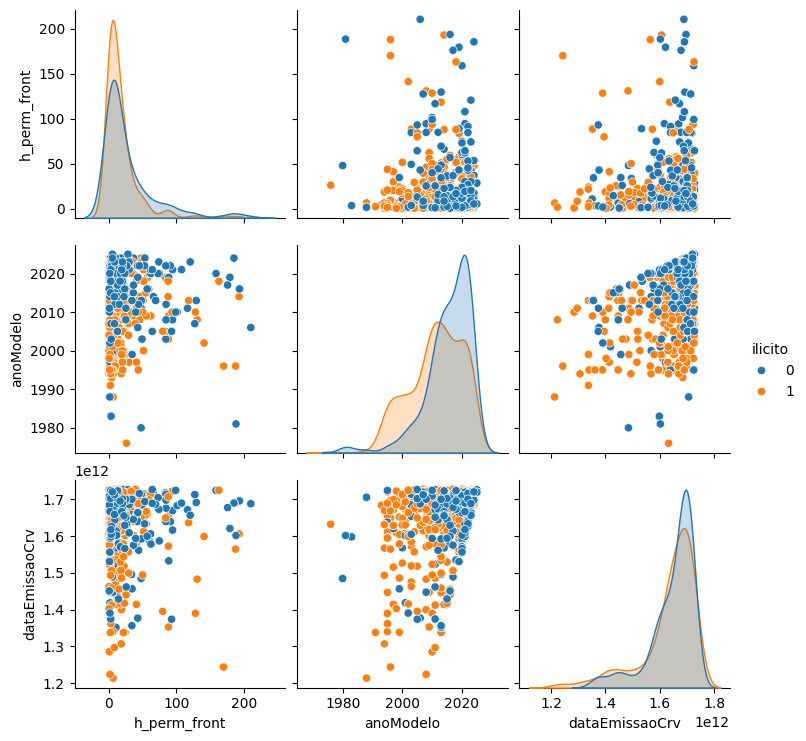

In [11]:
# Mostra pairplot para visualizar correlações
sns.pairplot(df_no_null, hue='ilicito')


In [12]:
# Pegar apenas 100 linhas extratificadas por "ilicito", de df_no_null
#df_no_null = df_no_null.groupby('ilicito').apply(lambda x: x.sample(100)).reset_index(drop=True)

In [13]:
df_no_null.head()

,placa,h_perm_front,anoModelo,categoria,cor,dataEmissaoCrv,descricaoTipoDocumentoProprietario,municipioEmplacamento,tipo,ufEmplacamento,descricao,ilicito
0,veiculo01,2.227,2021.0,ALUGUEL,AZUL,1.631070e+12,CNPJ,FOZ DO IGUACU,CAMINHAO TRATOR,PR,Não há restrições para este veículo no DENATRA...,1
1,veiculo02,1.723,2008.0,PARTICULAR,VERMELHA,1.712286e+12,CPF,BRASILIA,AUTOMOVEL,DF,Não há restrições para este veículo no DENATRA...,1
2,veiculo03,22.702,2005.0,PARTICULAR,PRATA,1.517969e+12,CPF,BRUSQUE,AUTOMOVEL,SC,Veículo com restrição judicial no sistema DENA...,1
3,veiculo04,13.781,2015.0,ALUGUEL,BRANCA,1.417054e+12,CNPJ,FLORIANOPOLIS,ONIBUS,SC,Não há restrições para este veículo no DENATRA...,1
4,veiculo05,4.937,2016.0,ALUGUEL,BRANCA,1.452737e+12,CNPJ,PONTA GROSSA,ONIBUS,PR,Não há restrições para este veículo no DENATRA...,1


In [14]:
# transformar a coluna anoModelo em idade do veículo
from datetime import datetime
df_no_null['idadeVeiculo'] = datetime.now().year - df_no_null['anoModelo'].astype(int)
df_no_null.head()

,placa,h_perm_front,anoModelo,categoria,cor,dataEmissaoCrv,descricaoTipoDocumentoProprietario,municipioEmplacamento,tipo,ufEmplacamento,descricao,ilicito,idadeVeiculo
0,veiculo01,2.227,2021.0,ALUGUEL,AZUL,1.631070e+12,CNPJ,FOZ DO IGUACU,CAMINHAO TRATOR,PR,Não há restrições para este veículo no DENATRA...,1,3
1,veiculo02,1.723,2008.0,PARTICULAR,VERMELHA,1.712286e+12,CPF,BRASILIA,AUTOMOVEL,DF,Não há restrições para este veículo no DENATRA...,1,16
2,veiculo03,22.702,2005.0,PARTICULAR,PRATA,1.517969e+12,CPF,BRUSQUE,AUTOMOVEL,SC,Veículo com restrição judicial no sistema DENA...,1,19
3,veiculo04,13.781,2015.0,ALUGUEL,BRANCA,1.417054e+12,CNPJ,FLORIANOPOLIS,ONIBUS,SC,Não há restrições para este veículo no DENATRA...,1,9
4,veiculo05,4.937,2016.0,ALUGUEL,BRANCA,1.452737e+12,CNPJ,PONTA GROSSA,ONIBUS,PR,Não há restrições para este veículo no DENATRA...,1,8


In [15]:
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 0 to 745
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   placa                               745 non-null    object 
 1   h_perm_front                        745 non-null    float64
 2   anoModelo                           745 non-null    float64
 3   categoria                           745 non-null    object 
 4   cor                                 745 non-null    object 
 5   dataEmissaoCrv                      745 non-null    float64
 6   descricaoTipoDocumentoProprietario  745 non-null    object 
 7   municipioEmplacamento               745 non-null    object 
 8   tipo                                745 non-null    object 
 9   ufEmplacamento                      745 non-null    object 
 10  descricao                           745 non-null    object 
 11  ilicito                             745 non-null  

In [16]:
df_no_null.shape

(745, 13)

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class DiasUltimoCrvTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_name='dataEmissaoCrv'):
        self.feature_name = feature_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_['diasUltimoCrv'] = X_[self.feature_name].apply(self.calcular_dias_ultimo_crv)
        return X_

    def calcular_dias_ultimo_crv(self, data_milisegundos):
        if pd.isna(data_milisegundos):  # Verifica se o valor é NaN
            return None
        data_emissao = datetime.fromtimestamp(data_milisegundos / 1000)
        dias_diferenca = (datetime.now() - data_emissao).days
        return dias_diferenca

#usando as funções acima altere os dados em df_no_null e exiba os dados dos novos atributos modificados
df_no_null = DiasUltimoCrvTransformer().fit_transform(df_no_null)
df_no_null.head()


,placa,h_perm_front,anoModelo,categoria,cor,dataEmissaoCrv,descricaoTipoDocumentoProprietario,municipioEmplacamento,tipo,ufEmplacamento,descricao,ilicito,idadeVeiculo,diasUltimoCrv
0,veiculo01,2.227,2021.0,ALUGUEL,AZUL,1.631070e+12,CNPJ,FOZ DO IGUACU,CAMINHAO TRATOR,PR,Não há restrições para este veículo no DENATRA...,1,3,1141
1,veiculo02,1.723,2008.0,PARTICULAR,VERMELHA,1.712286e+12,CPF,BRASILIA,AUTOMOVEL,DF,Não há restrições para este veículo no DENATRA...,1,16,201
2,veiculo03,22.702,2005.0,PARTICULAR,PRATA,1.517969e+12,CPF,BRUSQUE,AUTOMOVEL,SC,Veículo com restrição judicial no sistema DENA...,1,19,2450
3,veiculo04,13.781,2015.0,ALUGUEL,BRANCA,1.417054e+12,CNPJ,FLORIANOPOLIS,ONIBUS,SC,Não há restrições para este veículo no DENATRA...,1,9,3618
4,veiculo05,4.937,2016.0,ALUGUEL,BRANCA,1.452737e+12,CNPJ,PONTA GROSSA,ONIBUS,PR,Não há restrições para este veículo no DENATRA...,1,8,3205


In [18]:
#Remover dataEmissãoCrv do conjunto df_no_null
df_no_null = df_no_null.drop(['placa', 'dataEmissaoCrv'], axis=1)
df_no_null.head()

,h_perm_front,anoModelo,categoria,cor,descricaoTipoDocumentoProprietario,municipioEmplacamento,tipo,ufEmplacamento,descricao,ilicito,idadeVeiculo,diasUltimoCrv
0,2.227,2021.0,ALUGUEL,AZUL,CNPJ,FOZ DO IGUACU,CAMINHAO TRATOR,PR,Não há restrições para este veículo no DENATRA...,1,3,1141
1,1.723,2008.0,PARTICULAR,VERMELHA,CPF,BRASILIA,AUTOMOVEL,DF,Não há restrições para este veículo no DENATRA...,1,16,201
2,22.702,2005.0,PARTICULAR,PRATA,CPF,BRUSQUE,AUTOMOVEL,SC,Veículo com restrição judicial no sistema DENA...,1,19,2450
3,13.781,2015.0,ALUGUEL,BRANCA,CNPJ,FLORIANOPOLIS,ONIBUS,SC,Não há restrições para este veículo no DENATRA...,1,9,3618
4,4.937,2016.0,ALUGUEL,BRANCA,CNPJ,PONTA GROSSA,ONIBUS,PR,Não há restrições para este veículo no DENATRA...,1,8,3205


#Código para Treinamento com AutoML

In [19]:
df_no_null.shape

(745, 12)

In [22]:
#!pip uninstall auto-sklearn -y  # Uninstall first to ensure a clean installation
#!pip install auto-sklearn
!pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.8 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=b901b9761d5e9ecffaaeabda1ac24b98b2fa4865e6f3f78a6a27db8a86e6aa9a
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [23]:
import pandas as pd
import numpy as np
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Carregar os dados (ajuste o caminho para seu dataset)
df = df_no_null

# Tratar valores ausentes e eliminar colunas desnecessárias
df = df.drop(columns=['descricao'])

# Selecionar apenas colunas numéricas para calcular a mediana
# Use np.number directly instead of pd.np.number
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Convert categorical features to numerical using Label Encoding
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Get a list of categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Dividir as variáveis explicativas (X) da variável alvo (y)
X = df.drop(columns=['ilicito'])  # Todas as colunas exceto 'ilicito'
y = df['ilicito']  # A coluna alvo

# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar o TPOTClassifier
tpot = TPOTClassifier(verbosity=2, generations=10, population_size=20, random_state=42)

# Treinar o modelo
tpot.fit(X_train, y_train)

# Fazer previsões
y_pred = tpot.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')



# Exportar o pipeline gerado
tpot.export('best_pipeline.py')

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.744873949579832

Generation 2 - Current best internal CV score: 0.744873949579832

Generation 3 - Current best internal CV score: 0.7718347338935574

Generation 4 - Current best internal CV score: 0.7718347338935574

Generation 5 - Current best internal CV score: 0.7718347338935574

Generation 6 - Current best internal CV score: 0.7718347338935574

Generation 7 - Current best internal CV score: 0.7718347338935574

Generation 8 - Current best internal CV score: 0.7718347338935574

Generation 9 - Current best internal CV score: 0.7953081232492997

Generation 10 - Current best internal CV score: 0.7953081232492997

Best pipeline: BernoulliNB(RobustScaler(XGBClassifier(input_matrix, learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)), alpha=10.0, fit_prior=False)
Accuracy: 0.8926
Precision: 0.8675
Recall: 0.9351
F1-Score: 0.9000


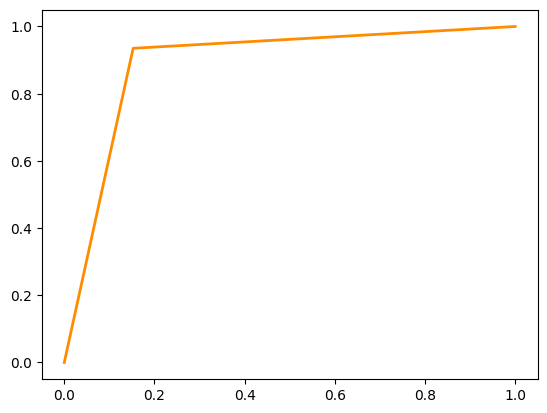

In [27]:
#exibir o grafico da curva ROC do modelo
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
#mostar o grafico e exibir a linha central e destacar o trashold
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)


#REGRESSÃO LOGISTICA

Melhores parâmetros encontrados pela busca bayesiana: OrderedDict([('classifier__C', 9.19573737494281), ('classifier__penalty', 'l1')])
Acurácia no conjunto de treino: 0.9245
Acurácia no conjunto de teste: 0.7785
Matriz de Confusão - Dados de Treino:
[[284  14]
 [ 31 267]]


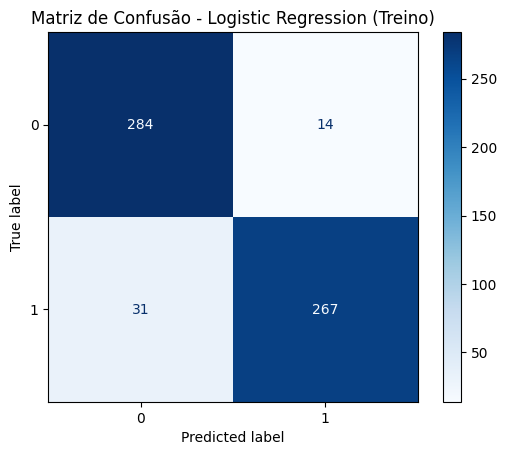

Matriz de Confusão - Dados de Teste:
[[61 13]
 [20 55]]


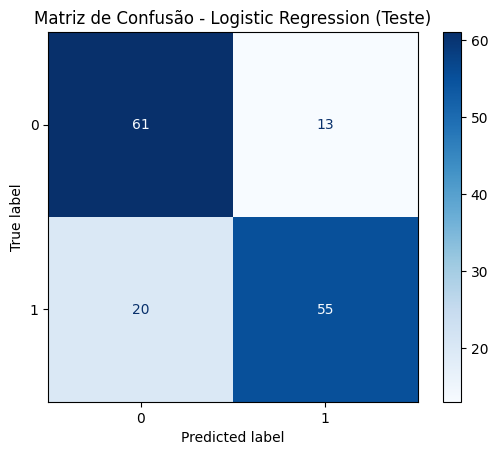

OrderedDict([('classifier__C', 9.19573737494281), ('classifier__penalty', 'l1')])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime
from skopt import BayesSearchCV  # Para busca bayesiana
import matplotlib.pyplot as plt

# Não mostrar os warnings
import warnings
warnings.filterwarnings('ignore')

# Transformador personalizado
class DiasUltimoCrvTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_name='dataEmissaoCrv'):
        self.feature_name = feature_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_['diasUltimoCrv'] = X_[self.feature_name].apply(self.calcular_dias_ultimo_crv)
        return X_

    def calcular_dias_ultimo_crv(self, data_milisegundos):
        data_emissao = datetime.fromtimestamp(data_milisegundos / 1000)
        dias_diferenca = (datetime.now() - data_emissao).days
        return dias_diferenca

# Preparação dos dados
# df_no_null é assumido como o DataFrame de entrada
X = df_no_null.drop(['placa', 'ilicito'], axis=1)
y = df_no_null['ilicito'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identificação de recursos numéricos e categóricos
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Criando o preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('dias_crv', DiasUltimoCrvTransformer(), ['dataEmissaoCrv'])
    ])

# Definindo o modelo e seus espaços de hiperparâmetros para busca bayesiana
models = {
    'Logistic Regression': {
        'model': Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=10000, solver="liblinear"))]),
        'params': {
            'classifier__C': [0.1, 100],
            'classifier__penalty': ['l1', 'l2']
        }
    }
}

# BayesSearchCV para Logistic Regression
log_reg_model = models['Logistic Regression']['model']
log_reg_params = models['Logistic Regression']['params']

bayes_search = BayesSearchCV(log_reg_model, log_reg_params, n_iter=30, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_train, y_train)

# Previsões para os dados de teste e treino
y_pred_test = bayes_search.predict(X_test)
y_pred_train = bayes_search.predict(X_train)

# Exibindo os melhores parâmetros
best_params = bayes_search.best_params_
print("Melhores parâmetros encontrados pela busca bayesiana:", best_params)

# Avaliação de desempenho para o conjunto de treino
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Acurácia no conjunto de treino: {accuracy_train:.4f}")

# Avaliação de desempenho para o conjunto de teste
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {accuracy_test:.4f}")

# Gerar a matriz de confusão para os dados de treino
cm_train = confusion_matrix(y_train, y_pred_train)
print("Matriz de Confusão - Dados de Treino:")
print(cm_train)

# Exibir a matriz de confusão dos dados de treino de forma gráfica
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Logistic Regression (Treino)')
plt.show()

# Gerar a matriz de confusão para os dados de teste
cm_test = confusion_matrix(y_test, y_pred_test)
print("Matriz de Confusão - Dados de Teste:")
print(cm_test)

# Exibir a matriz de confusão dos dados de teste de forma gráfica
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Logistic Regression (Teste)')
plt.show()

#mostre os best parameters
print(bayes_search.best_params_)


#RANDOM FOREST

Melhores parâmetros encontrados pela busca bayesiana: OrderedDict([('classifier__max_depth', 50), ('classifier__max_features', 'sqrt'), ('classifier__min_samples_leaf', 1), ('classifier__min_samples_split', 3), ('classifier__n_estimators', 50)])
Acurácia no conjunto de treino: 1.0000
Acurácia no conjunto de teste: 0.8121
Matriz de Confusão - Dados de Treino:
[[298   0]
 [  0 298]]


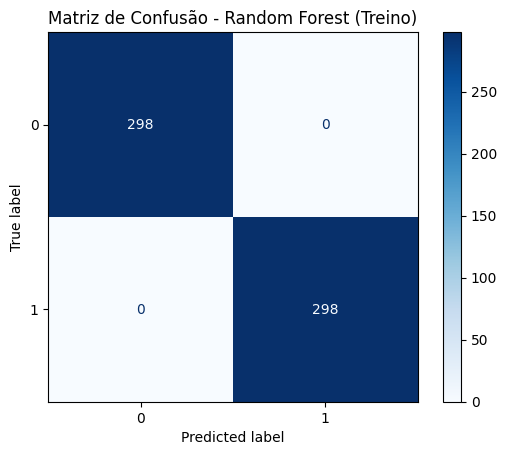

Matriz de Confusão - Dados de Teste:
[[65  9]
 [19 56]]


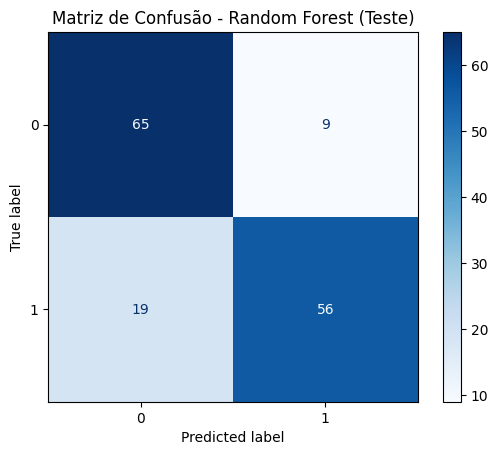

Melhores parâmetros encontrados pela busca bayesiana: OrderedDict([('classifier__max_depth', 50), ('classifier__max_features', 'sqrt'), ('classifier__min_samples_leaf', 1), ('classifier__min_samples_split', 3), ('classifier__n_estimators', 50)])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime
from skopt import BayesSearchCV  # Para busca bayesiana
import matplotlib.pyplot as plt

# Não mostrar os warnings
import warnings
warnings.filterwarnings('ignore')

# Transformador personalizado
class DiasUltimoCrvTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_name='dataEmissaoCrv'):
        self.feature_name = feature_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_['diasUltimoCrv'] = X_[self.feature_name].apply(self.calcular_dias_ultimo_crv)
        return X_

    def calcular_dias_ultimo_crv(self, data_milisegundos):
        data_emissao = datetime.fromtimestamp(data_milisegundos / 1000)
        dias_diferenca = (datetime.now() - data_emissao).days
        return dias_diferenca

# Preparação dos dados
# df_no_null é assumido como o DataFrame de entrada
X = df_no_null.drop(['placa', 'ilicito'], axis=1)
y = df_no_null['ilicito'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identificação de recursos numéricos e categóricos
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Criando o preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('dias_crv', DiasUltimoCrvTransformer(), ['dataEmissaoCrv'])
    ])

# Definindo o modelo e seus espaços de hiperparâmetros para busca bayesiana
models = {
    'Random Forest': {
        'model': Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))]),
        'params': {
            'classifier__n_estimators': (10,50),  # Intervalo de estimadores
            'classifier__max_depth': (5, 50),  # Intervalo de profundidade máxima
            'classifier__min_samples_split': (2, 10),  # Divisões mínimas de amostras
            'classifier__min_samples_leaf': (1, 5),  # Folhas mínimas de amostras
            'classifier__max_features': ['sqrt', 'log2']  # Número de recursos considerados
        }
    }
}

# BayesSearchCV para Random Forest
random_forest_model = models['Random Forest']['model']
random_forest_params = models['Random Forest']['params']

# Realizando a busca bayesiana para otimizar hiperparâmetros
bayes_search = BayesSearchCV(random_forest_model, random_forest_params, n_iter=30, cv=5, scoring='accuracy', random_state=42)
bayes_search.fit(X_train, y_train)

# Previsões para os dados de teste e treino
y_pred_test = bayes_search.predict(X_test)
y_pred_train = bayes_search.predict(X_train)

# Exibindo os melhores parâmetros
best_params = bayes_search.best_params_
print("Melhores parâmetros encontrados pela busca bayesiana:", best_params)

# Avaliação de desempenho para o conjunto de treino
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Acurácia no conjunto de treino: {accuracy_train:.4f}")

# Avaliação de desempenho para o conjunto de teste
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {accuracy_test:.4f}")

# Gerar a matriz de confusão para os dados de treino
cm_train = confusion_matrix(y_train, y_pred_train)
print("Matriz de Confusão - Dados de Treino:")
print(cm_train)

# Exibir a matriz de confusão dos dados de treino de forma gráfica
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp_train.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Random Forest (Treino)')
plt.show()

# Gerar a matriz de confusão para os dados de teste
cm_test = confusion_matrix(y_test, y_pred_test)
print("Matriz de Confusão - Dados de Teste:")
print(cm_test)

# Exibir a matriz de confusão dos dados de teste de forma gráfica
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp_test.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Random Forest (Teste)')
plt.show()

# Mostrar os melhores parâmetros
print("Melhores parâmetros encontrados pela busca bayesiana:", bayes_search.best_params_)


#Pipeline nova tentativa

In [ ]:
# Construção do pipeline diferenciado por tipo de coluna

# Pacotes sklearn
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Transformador personalizado para calcular a diferença de dias
class DiasUltimoCrvTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_name='dataEmissaoCrv'):
        self.feature_name = feature_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_['diasUltimoCrv'] = X_[self.feature_name].apply(self.calcular_dias_ultimo_crv)
        return X_

    def calcular_dias_ultimo_crv(self, data_milisegundos):
        data_emissao = datetime.fromtimestamp(data_milisegundos / 1000)
        dias_diferenca = (datetime.now() - data_emissao).days
        return dias_diferenca

In [ ]:
# Detalhes ColumnTransformer: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
# Pré-processador, incluindo a conversão de categóricas no pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('dias_crv', DiasUltimoCrvTransformer(), ['dataEmissaoCrv'])
    ])
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=10000, solver="liblinear", penalty='l1')),
    ],
)

In [ ]:
# Separando a variável alvo 'ilicito' e removendo a coluna 'placa'
X = df_no_null.drop(['placa', 'ilicito'], axis=1)
y = df_no_null['ilicito'].astype(int)

In [ ]:
print(X.shape)
print(y.shape)

(745, 10)
(745,)


In [ ]:
# Definindo as colunas numéricas e categóricas
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
m = pipe.fit(X_train, y_train)

In [ ]:
m.score(X_test, y_test)

0.4966442953020134

In [ ]:
m

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['h_perm_front', 'anoModelo', 'dataEmissaoCrv'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['categoria', 'cor', 'descricaoTipoDocumentoProprietario',
       'municipioEmplacamento', 'tipo', 'ufEmplacamento', 'descricao'],
      dtype='object')),
                                                 ('dias_crv',
                                                  DiasUltimoCrvTransformer(),
                                                  ['dataEmissaoCrv'])])),
                ('classifier',
                 LogisticRegression(max_iter=10000, penalty='l1',
                                    solver='liblinear'))])

In [ ]:
# O pipeline definido anteriormente pode também ser utilizado em uma busca por hiper-parâmetros otimizados
param_grid = {
    'classifier__C': [0.5, 1.0, 2],
    'classifier__penalty': ['l1','l2']
}

In [ ]:
grid_search = GridSearchCV(m, param_grid, n_jobs=-1, verbose=1, cv=3)

In [ ]:
grid_search.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['h_perm_front', 'anoModelo', 'dataEmissaoCrv'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['categoria', 'cor', 'descricaoTipoDocumentoProprietario',
       'municipioEmplacamento', 'tipo', 'ufEmplacamento', 'descricao'],
      dtype='object')),
                                                                        ('dias_crv',
                                                                         DiasUltimoCrvTransformer(),
                                                                         ['dataEmissaoCrv'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='l1',
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.5, 1.0, 2],
                         'classifier__penalty': ['l1', 'l2']},
             verbose=1)

In [ ]:
grid_search.score(X_test, y_test)

0.7449664429530202

In [ ]:
best = grid_search.best_estimator_.get_params()
best

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num', StandardScaler(),
                                    Index(['h_perm_front', 'anoModelo', 'dataEmissaoCrv'], dtype='object')),
                                   ('cat', OneHotEncoder(handle_unknown='ignore'),
                                    Index(['categoria', 'cor', 'descricaoTipoDocumentoProprietario',
          'municipioEmplacamento', 'tipo', 'ufEmplacamento', 'descricao'],
         dtype='object')),
                                   ('dias_crv', DiasUltimoCrvTransformer(),
                                    ['dataEmissaoCrv'])])),
  ('classifier',
   LogisticRegression(C=2, max_iter=10000, penalty='l1', solver='liblinear'))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  Index(['h_perm_front', 'anoModelo', 'dataEmissaoCrv'], dtype='object')),
                                 ('cat', OneHotEncoder(handle_unk

In [ ]:
for p in sorted(param_grid.keys()):
    print(f"{p}: {best[p]}")

classifier__C: 2
classifier__penalty: l1


In [ ]:
!pip install plot-confusion-matrix

In [ ]:
from plot_confusion_matrix import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
#confusion_matrix(grid_search, X_test, y_test.values.ravel(),values_format='d');
#Crie a matrix de confusão
y_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

IndexError: tuple index out of range

#TENTATIVA ENSEMBLE

In [ ]:
# Separando a variável alvo 'ilicito' e removendo a coluna 'placa'
X = df_no_null.drop(['placa', 'ilicito', 'anoModelo', 'dataEmissaoCrv'], axis=1)
y = df_no_null['ilicito'].astype(int)

In [ ]:
# Definindo as colunas numéricas e categóricas
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

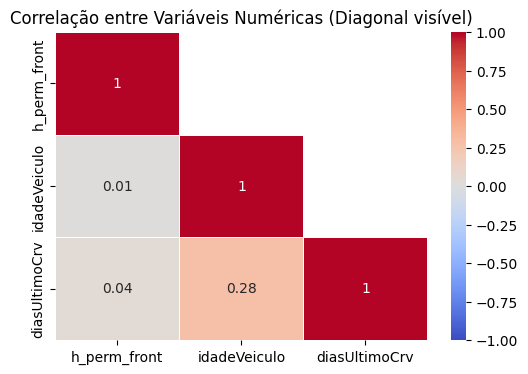

In [ ]:
import numpy as np

plt.figure(figsize=(6,4))
corr_matrix = df_no_null[numerical_features].corr().round(2)

# Criar uma máscara para a parte superior da matriz de correlação, sem excluir a diagonal
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)  # k=1 mantém a diagonal

# Exibir a matriz de correlação com a diagonal visível
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlação entre Variáveis Numéricas (Diagonal visível)')
plt.show()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime

# Transformador personalizado para calcular a diferença de dias
class DiasUltimoCrvTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_name='dataEmissaoCrv'):
        self.feature_name = feature_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_['diasUltimoCrv'] = X_[self.feature_name].apply(self.calcular_dias_ultimo_crv)
        return X_

    def calcular_dias_ultimo_crv(self, data_milisegundos):
        if pd.isna(data_milisegundos):  # Verifica se o valor é NaN
            return None
        data_emissao = datetime.fromtimestamp(data_milisegundos / 1000)
        dias_diferenca = (datetime.now() - data_emissao).days
        return dias_diferenca

#Definir a pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('dias_crv', DiasUltimoCrvTransformer(), ['dataEmissaoCrv'])
    ],
    remainder='passthrough'
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

####Random Forest

In [ ]:
%%time
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier
param_grid_rf = {
    'classifier__n_estimators': [130],
    'classifier__max_depth': [30],
    'classifier__min_samples_split': [11]
}

undersampler = RandomUnderSampler(random_state=42)

# Definir pipeline com RandomForest
pipeline_rf = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('dias_crv', DiasUltimoCrvTransformer(), ['dataEmissaoCrv'])
    ])

# Grid Search com validação cruzada para RandomForest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Exibir os melhores parâmetros para RandomForest
print("Melhores parâmetros para RandomForest:", grid_search_rf.best_params_)
grid_search_rf.score(X_test, y_test)

ValueError: Invalid parameter 'classifier' for estimator ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['h_perm_front', 'idadeVeiculo', 'diasUltimoCrv'], dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['categoria', 'cor', 'descricaoTipoDocumentoProprietario',
       'municipioEmplacamento', 'tipo', 'ufEmplacamento', 'descricao'],
      dtype='object')),
                                ('dias_crv', DiasUltimoCrvTransformer(),
                                 ['dataEmissaoCrv'])]). Valid parameters are: ['force_int_remainder_cols', 'n_jobs', 'remainder', 'sparse_threshold', 'transformer_weights', 'transformers', 'verbose', 'verbose_feature_names_out'].

#### Logistic Regression

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression

# Logistic Regression
param_grid_lr = {
    'classifier__C': [1],
    'classifier__max_iter': [72],
    'classifier__solver': ['liblinear']
}

pipeline_lr = ImbPipeline([
    ('preprocessor', preprocessor),
    ('undersampler', undersampler),
    ('classifier', LogisticRegression(random_state=42))
])

# Grid Search com validação cruzada para Logistic Regression
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

# Exibir os melhores parâmetros para Logistic Regression
print("Melhores parâmetros para Logistic Regression:", grid_search_lr.best_params_)
grid_search_lr.score(X_test, y_test)

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'dataEmissaoCrv'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_indexing.py", line 361, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'dataEmissaoCrv'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 329, in fit
    Xt, yt = self._fit(X, y, routed_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 255, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 1104, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 968, in fit_transform
    self._validate_column_callables(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 536, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_indexing.py", line 369, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


#### XGBoost Classifier

In [ ]:
%%time
# import
from xgboost import XGBClassifier
# XGBoost Classifier
param_grid_xgb = {
    'classifier__n_estimators': [300, 350, 400],
    'classifier__learning_rate': [0.1],
    'classifier__max_depth': [4, 5]
}

pipeline_xgb = ImbPipeline([
    ('preprocessor', preprocessor),
    ('undersampler', undersampler),
    ('classifier', XGBClassifier(random_state=42, eval_metric='logloss'))
])

# Grid Search com validação cruzada para XGBoost
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Exibir os melhores parâmetros para XGBoost
print("Melhores parâmetros para XGBoost:", grid_search_xgb.best_params_)
grid_search_xgb.score(X_test, y_test)

Melhores parâmetros para XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__n_estimators': 350}
CPU times: user 886 ms, sys: 87.4 ms, total: 974 ms
Wall time: 4.69 s


0.8389261744966443

## 4 - Avaliação dos Modelos

###Random Forest

In [ ]:
# Realizando a transformação
X_transformed = preprocessor.fit_transform(df)

# Verificar quais colunas foram transformadas
# Vamos pegar as colunas numéricas transformadas e categóricas
num_columns = numerical_features  # Apenas as colunas numéricas, já que são escaladas pelo StandardScaler
cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)  # As categóricas, OneHotEncoded
transformed_columns = ['diasUltimoCrv', 'anoModelo']

# Criar um DataFrame apenas com as colunas transformadas
df_transformed_only = pd.DataFrame(X_transformed[:, -len(transformed_columns):], columns=transformed_columns)

# Exibir as colunas transformadas
print(df_transformed_only)


                diasUltimoCrv anoModelo
0            SCANIA/R450 A6X2         1
1            GM/CELTA 2P LIFE         1
2            GM/CELTA 4P LIFE         1
3    SCANIA/MPOLO PARADISO DD         1
4     VOLVO/MPOLO PARADISO LD         1
..                        ...       ...
741      FIAT/STRADA RANCH AT         0
742           SR/RANDON SR CA         0
743    NISSAN/KICKS SENSE CVT         0
744               VW/POLO 1.6         0
745     M.BENZ/ACCELO 1016 CE         0

[746 rows x 2 columns]


Relatório de Classificação - RandomForest:
              precision    recall  f1-score   support

           0       0.77      0.89      0.82        74
           1       0.87      0.73      0.80        75

    accuracy                           0.81       149
   macro avg       0.82      0.81      0.81       149
weighted avg       0.82      0.81      0.81       149



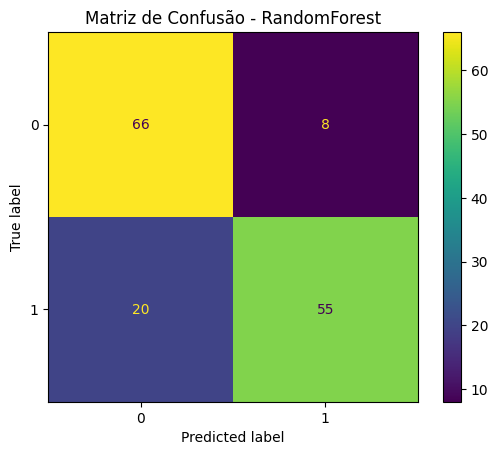

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Avaliar RandomForest
y_pred_rf = grid_search_rf.predict(X_test)
print("Relatório de Classificação - RandomForest:")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Matriz de Confusão - RandomForest')
plt.show()

###Logistic Regression

Relatório de Classificação - Logistic Regression:
              precision    recall  f1-score   support

           0       0.50      1.00      0.66        74
           1       0.00      0.00      0.00        75

    accuracy                           0.50       149
   macro avg       0.25      0.50      0.33       149
weighted avg       0.25      0.50      0.33       149



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


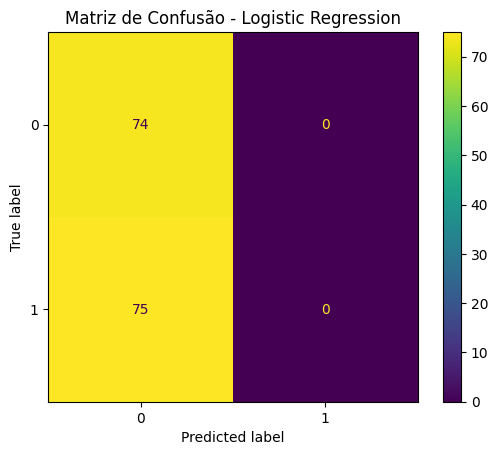

In [ ]:
# Avaliar Logistic Regression
y_pred_lr = grid_search_lr.predict(X_test)
print("Relatório de Classificação - Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot()
plt.title('Matriz de Confusão - Logistic Regression')
plt.show()

###XGBoost

Relatório de Classificação - XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        74
           1       0.90      0.76      0.83        75

    accuracy                           0.84       149
   macro avg       0.85      0.84      0.84       149
weighted avg       0.85      0.84      0.84       149



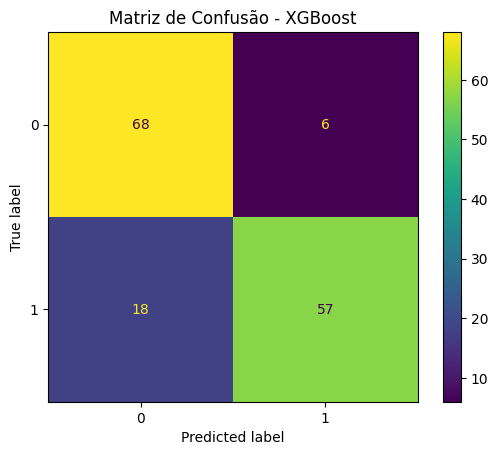

In [ ]:
# Avaliar XGBoost
y_pred_xgb = grid_search_xgb.predict(X_test)
print("Relatório de Classificação - XGBoost:")
print(classification_report(y_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)#, display_labels=['<=50K', '>50K'])
disp_xgb.plot()
plt.title('Matriz de Confusão - XGBoost')
plt.show()

##5 - Salvar o melhor Modelo

In [ ]:
import joblib
# Salvar o Modelo (RandomForest como exemplo)
joblib.dump(grid_search_rf, 'random_forest_model.pkl')
print("Modelo XGBoost salvo como 'adult_income_xgboost_model.pkl'")

Modelo XGBoost salvo como 'adult_income_xgboost_model.pkl'


## 6 - Model Ensemble

### 6.2 - Avaliar modelo Ensemble

Relatório de Classificação - Ensemble (Voting Classifier):
              precision    recall  f1-score   support

           0       0.75      0.95      0.84        74
           1       0.93      0.69      0.79        75

    accuracy                           0.82       149
   macro avg       0.84      0.82      0.82       149
weighted avg       0.84      0.82      0.82       149



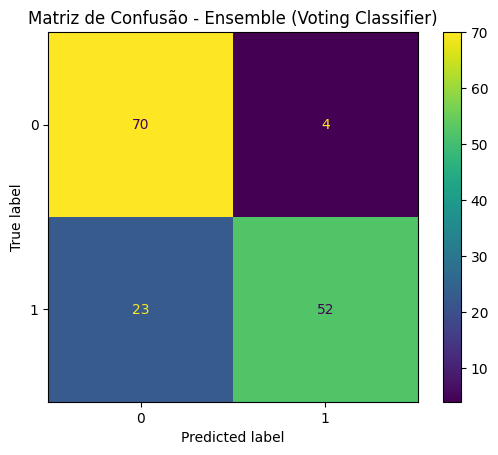

In [ ]:
from sklearn.ensemble import VotingClassifier

# 6 - Criar Ensemble com Voting Classifier (usando os modelos já treinados)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', grid_search_rf.best_estimator_),  # Usando os melhores estimadores já ajustados
        ('lr', grid_search_lr.best_estimator_),
        ('xgb', grid_search_xgb.best_estimator_)
    ],
    voting='hard'  # Usar 'hard' para voto majoritário ou 'soft' para média das probabilidades
)

# Ajustar o ensemble com o conjunto de treino (fit)
voting_clf.fit(X_train, y_train)

# Fazer previsões com o ensemble
y_pred_ensemble = voting_clf.predict(X_test)

# 7 - Avaliar Ensemble

print("Relatório de Classificação - Ensemble (Voting Classifier):")
print(classification_report(y_test, y_pred_ensemble))

# Matriz de Confusão para o Ensemble
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
disp_ensemble = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble)#, display_labels=['<=50K', '>50K'])
disp_ensemble.plot()
plt.title('Matriz de Confusão - Ensemble (Voting Classifier)')
plt.show()


## 7 - Salvar o Modelo Ensemble

In [ ]:
# Salvar o Modelo Ensemble
joblib.dump(voting_clf, 'voting_classifier_model.pkl')
print("Modelo Ensemble (Voting Classifier) salvo como 'voting_classifier_model.pkl'")

PicklingError: Can't pickle <class '__main__.DiasUltimoCrvTransformer'>: it's not the same object as __main__.DiasUltimoCrvTransformer